# Movie Analysis

<img src="images/movie_analysis.jpg">

## Overview
This project analyzes the movie industry on multiple large data sets. These data sets include different types of movie information. Descriptive analysis helps define "successful movies" in financial terms and what contributes to "successful movies". Stakeholders can use this analysis to determine the movie genre, directors, writers, movie length, and release month. 

## Business Problem
Microsoft's subsidiary sees an opportunity and has decided to create a movie studio to make original video content. My job is to exploring successful movies and provide recommendations on movie genre, directors, writers, release month, and movie length.
***
Questions to consider:
* What is a successful movie?
* What genres should be chosen among those successful movies?
* Which directors and writers should be hired among those successful movies?
* Which month has the highest release of successful movies?
* What is the optimal movie length among those successful movies?

## Data Understanding
The IMDb website is the most popular movie website which combines many aspects of movie information(e.g. genres, title, cast). Each movie has a unique identifier (<b>tconst</b>) and each related person also has a unique name identifier (<b>nconst</b>). Data used from [IMDb](https://datasets.imdbws.com/)  include:

* imdb.title.basics
* imdb.title.crew 
* imdb.name.basics

<img src="images/imdb logo.png" width="200">

The Numbers website provides detailed movie financial analysis which tracks box office revenue in a systematic, algorithmic way. Data used from [The Numbers](https://www.the-numbers.com/movie/budgets/all) include:
* tn.movie_budgets

<img src="images/the numbers logo.jpg" width="400">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

### Data Name: imdb.title.basics

In [2]:
df1 = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')
display(df1.shape)
display(df1.head())
display(df1.info())

(146144, 6)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

In [3]:
# Check if tconst has duplicated
df1['tconst'].duplicated().any()

False

In [4]:
# Check the earliest and latest year
display(df1['start_year'].min())
display(df1['start_year'].max())

2010

2115

In [5]:
# Check movie name
df1[df1['primary_title'].duplicated(keep=False)].sort_values(by='primary_title')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
131857,tt8219776,#5,#5,2018,NaN,Documentary
52892,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy"
106201,tt6214664,(aguirre),(aguirre),2016,98.0,"Biography,Comedy,Documentary"
103890,tt6085916,(aguirre),(aguirre),2016,97.0,"Biography,Documentary"
100818,tt5891614,1,1,2016,22.0,Documentary
...,...,...,...,...,...,...
37636,tt2362758,Éden,Éden,2013,73.0,Drama
93912,tt5471216,Ódio,Ódio,2017,NaN,Action
98200,tt5737878,Ódio,Ódio,2016,NaN,Drama
72701,tt4149802,Ümmü Sibyan: Zifir,Ümmü Sibyan: Zifir,2014,NaN,Horror


#### Note
* "<b>tconst</b>" is alphanumeric <b>unique</b> identifier of the movie_title (from [imdb website](https://www.imdb.com/interfaces/) ) which consider as the standard for further analysis.
* If two different tconsts have the same primary_title or other same information, it still means that they are two different movies.
* These datas are not consider as duplicates.

### Data Cleaning

In [6]:
# Change primary_title to movie_title
df1.rename(columns={'primary_title' : 'movie_title'}, inplace=True)

In [7]:
# Drop unnecessary columns
df1.drop(columns=['original_title'], inplace=True)

In [8]:
# Check
df1.columns

Index(['tconst', 'movie_title', 'start_year', 'runtime_minutes', 'genres'], dtype='object')

### Data Name: imdb.title.crew

In [9]:
df2 = pd.read_csv('zippedData/imdb.title.crew.csv.gz', compression='gzip')
display(df2.shape)
display(df2.head())
display(df2.info())

(146144, 3)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


None

In [10]:
# Check if tconst has duplicated
df2['tconst'].duplicated().any()

False

### Data Merging

In [11]:
# Merge df1 with df2 based on tconst
df3 = pd.merge(df1, df2, how='left')
display(df3.shape)
df3.head()

(146144, 7)

,tconst,movie_title,start_year,runtime_minutes,genres,directors,writers
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",nm0002411,NaN
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,nm0000080,"nm0000080,nm0462648"
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,nm0347899
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy","nm0765384,nm0749914","nm1360635,nm0749914"


In [12]:
# Check if tconst has duplicated
df3['tconst'].duplicated().any()

False

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 7 columns):
tconst             146144 non-null object
movie_title        146144 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
directors          140417 non-null object
writers            110261 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 8.9+ MB


### Data Source: tn.movie_budgets

In [14]:
df4 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
display(df4.shape)
display(df4.head())
display(df4.info())

(5782, 6)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

### Data Cleaning

In [15]:
# Change movie to movie_title
df4.rename(columns={'movie' : 'movie_title'}, inplace=True)

In [16]:
# Check for duplicates
df4[df4['id'].duplicated(keep=False)].sort_values(by='id')

,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
5200,1,"May 14, 2003",Dracula: Pages from a Virgin's Diary,"$1,100,000","$39,659","$81,371"
2500,1,"Jun 16, 1978",Jaws 2,"$20,000,000","$102,922,376","$208,900,376"
4200,1,"Mar 18, 2011",Winter in Wartime,"$5,800,000","$542,860","$9,662,214"
2400,1,"Jun 24, 1987",Spaceballs,"$22,700,000","$38,119,483","$38,119,483"
...,...,...,...,...,...,...
3899,100,"Jun 12, 2015",Me and Earl and the Dying Girl,"$8,000,000","$6,758,416","$9,266,180"
299,100,"Jul 22, 2005",The Island,"$120,000,000","$35,818,913","$163,018,913"
699,100,"Nov 8, 1996",Ransom,"$70,000,000","$136,492,681","$308,700,000"
799,100,"Dec 8, 2004",Blade: Trinity,"$65,000,000","$52,397,389","$131,353,165"


In [17]:
# Drop unnecessary columns because id is not a unique identifier for this dataframe
df4.drop(columns=['id'], inplace=True)

In [18]:
df4[df4['movie_title'].duplicated(keep=False)].sort_values(by='movie_title').head(6)

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
4270,"Dec 23, 1954","20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000"
5614,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
1648,"Apr 30, 2010",A Nightmare on Elm Street,"$35,000,000","$63,075,011","$117,729,621"
5016,"Nov 9, 1984",A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513"
2032,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"
80,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"


#### Note
* Unlike the <imdb.title.basics> data, <tn.movie_budgets> does not have a unique identifier.
* These moives have same title but different release_date. 
* Can not easily judge if these movies are the same or different.
* The best way is to combine this dataframe with other dataframe has unique identifier.

In [19]:
# Remove the $ sign and comma
# Change budget and gross type from object to float
# df4['production_budget'] = df4['production_budget'].str.replace("$","").str.replace(",", "").astype(float)
# df4['domestic_gross'] = df4['domestic_gross'].str.replace("$","").str.replace(",", "").astype(float)
# df4['worldwide_gross'] = df4['worldwide_gross'].str.replace("$","").str.replace(",", "").astype(float)

In [20]:
# Access production_budget, domestic_gross, worldwide_gross columns only
df4.columns[2:5]

Index(['production_budget', 'domestic_gross', 'worldwide_gross'], dtype='object')

In [21]:
# Remove the $ sign and comma
# Change budget and gross type from object to float
for col in df4.columns[2:5]:
    df4[col] = df4[col].str.replace("$","").str.replace(",", "").astype(float)

In [22]:
# Change release_date from object to datetime64
df4['release_date'] = pd.to_datetime(df4['release_date'])

In [23]:
# Make a new column for the year
df4['year'] = df4['release_date'].dt.year

In [24]:
# Check
display(df4.head(1))
display(df4.info())

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,year
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
release_date         5782 non-null datetime64[ns]
movie_title          5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
year                 5782 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB


None

In [25]:
display(df4['year'].min())
display(df4['year'].max())

1915

2020

### Data Merging

In [26]:
# Merge the df3 and df4 based on movie_title and these movie title will have a unique identifier
# Want to keep the budget and gross (df4) for further analysis
df5 = pd.merge(df3, df4, how='right')
display(df5.shape)
df5.head()

(7221, 12)

,tconst,movie_title,start_year,runtime_minutes,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross,year
0,tt0249516,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",nm0440415,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297",2012-12-31,45000000.0,0.0,73706.0,2012
1,tt0293429,Mortal Kombat,2021.0,NaN,"Action,Adventure,Fantasy",nm2585406,nm3859643,1995-08-18,20000000.0,70433227.0,122133227.0,1995
2,tt0326592,The Overnight,2010.0,88.0,NaN,nm1208371,"nm1170333,nm1208371",2015-06-19,200000.0,1109808.0,1165996.0,2015
3,tt3844362,The Overnight,2015.0,79.0,"Comedy,Mystery",nm2674307,nm2674307,2015-06-19,200000.0,1109808.0,1165996.0,2015
4,tt0337692,On the Road,2012.0,124.0,"Adventure,Drama,Romance",nm0758574,"nm0449616,nm1433580",2013-03-22,25000000.0,720828.0,9313302.0,2013


In [27]:
# Check the duplicates
df5[df5['movie_title'].duplicated(keep=False)].sort_values(by='movie_title').head(10)

,tconst,movie_title,start_year,runtime_minutes,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross,year
2702,tt5671400,1982,2015.0,11.0,Documentary,nm5608474,nm5608474,2016-03-01,1000000.0,0.0,0.0,2016
2701,tt2388621,1982,2013.0,90.0,Drama,nm2179966,nm2179966,2016-03-01,1000000.0,0.0,0.0,2016
6359,NaN,"20,000 Leagues Under the Sea",NaN,NaN,NaN,NaN,NaN,1916-12-24,200000.0,8000000.0,8000000.0,1916
6358,NaN,"20,000 Leagues Under the Sea",NaN,NaN,NaN,NaN,NaN,1954-12-23,5000000.0,28200000.0,28200000.0,1954
1189,tt8558372,3,2018.0,17.0,Documentary,nm7835704,NaN,2011-09-16,7200000.0,59774.0,295492.0,2011
1186,tt2379653,3,2012.0,115.0,"Comedy,Drama",nm0831526,"nm0208508,nm0714261,nm0831526",2011-09-16,7200000.0,59774.0,295492.0,2011
1185,tt2123129,3,2012.0,145.0,"Drama,Mystery,Romance",nm1957070,nm1957070,2011-09-16,7200000.0,59774.0,295492.0,2011
1184,tt1517177,3,2010.0,119.0,"Comedy,Drama,Romance",nm0878756,nm0878756,2011-09-16,7200000.0,59774.0,295492.0,2011
1187,tt5618160,3,2018.0,80.0,"Horror,Mystery,Thriller",nm4840973,nm4840973,2011-09-16,7200000.0,59774.0,295492.0,2011
1188,tt5785598,3,2015.0,57.0,Drama,"nm8196935,nm8196934",nm8196935,2011-09-16,7200000.0,59774.0,295492.0,2011


#### Note:
* df3 was merge on the df4 based on the same movie_title, however, there still exists duplicate movies.
* The best way to remove those duplicates is to match start_year column with the year column to make sure they are the same movie. (df3 has the start_year, and df4 has the year column)

### Data Cleaning

In [28]:
# Only keep the rows with the correct matching years
# This filtrate will only keep movie between 2010 and 2020
df6 = df5[df5['start_year'] == df5['year']]

In [29]:
# Check
display(df6['year'].min())
display(df6['year'].max())

2010

2020

In [30]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 3797
Data columns (total 12 columns):
tconst               1547 non-null object
movie_title          1547 non-null object
start_year           1547 non-null float64
runtime_minutes      1521 non-null float64
genres               1541 non-null object
directors            1541 non-null object
writers              1513 non-null object
release_date         1547 non-null datetime64[ns]
production_budget    1547 non-null float64
domestic_gross       1547 non-null float64
worldwide_gross      1547 non-null float64
year                 1547 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 157.1+ KB


In [31]:
# Preview
df6.head()

,tconst,movie_title,start_year,runtime_minutes,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross,year
0,tt0249516,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",nm0440415,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297",2012-12-31,45000000.0,0.0,73706.0,2012
3,tt3844362,The Overnight,2015.0,79.0,"Comedy,Mystery",nm2674307,nm2674307,2015-06-19,200000.0,1109808.0,1165996.0,2015
6,tt3872966,On the Road,2013.0,87.0,Documentary,nm4953104,NaN,2013-03-22,25000000.0,720828.0,9313302.0,2013
10,tt0359950,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",nm0001774,"nm0175726,nm0862122",2013-12-25,91000000.0,58236838.0,187861183.0,2013
11,tt0365907,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",nm0291082,"nm0088747,nm0291082",2014-09-19,28000000.0,26017685.0,62108587.0,2014


In [32]:
# Check for duplicates again
df6[df6['movie_title'].duplicated(keep=False)].sort_values(by='movie_title').head(10)

,tconst,movie_title,start_year,runtime_minutes,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross,year
1244,tt2027265,A Better Life,2011.0,110.0,Drama,nm0434806,"nm1771591,nm0434806",2011-06-24,10000000.0,1759252.0,1884251.0,2011
1243,tt1554091,A Better Life,2011.0,98.0,"Drama,Romance",nm0919363,"nm1067858,nm0800363",2011-06-24,10000000.0,1759252.0,1884251.0,2011
1338,tt2447982,Abduction,2011.0,84.0,"Horror,Thriller",nm5303254,nm4464037,2011-09-23,35000000.0,28087155.0,86648359.0,2011
1336,tt1600195,Abduction,2011.0,106.0,"Action,Mystery,Thriller",nm0005436,nm0159900,2011-09-23,35000000.0,28087155.0,86648359.0,2011
1366,tt7501544,Absentia,2011.0,60.0,Sci-Fi,nm9339179,nm9339179,2011-12-31,70000.0,0.0,8555.0,2011
1365,tt1610996,Absentia,2011.0,87.0,"Drama,Horror,Mystery",nm1093039,nm1093039,2011-12-31,70000.0,0.0,8555.0,2011
2469,tt2205401,Addicted,2014.0,106.0,"Drama,Thriller",nm0937306,"nm0920530,nm0053228,nm2268532",2014-10-10,5000000.0,17390770.0,17499242.0,2014
2470,tt3435418,Addicted,2014.0,97.0,"Documentary,Music",nm5356389,nm5356389,2014-10-10,5000000.0,17390770.0,17499242.0,2014
602,tt1799508,After,2012.0,90.0,"Drama,Fantasy,Mystery",nm3081301,"nm2859813,nm3081301",2012-12-31,650000.0,0.0,0.0,2012
603,tt2404163,After,2012.0,83.0,Romance,nm0537611,nm0537611,2012-12-31,650000.0,0.0,0.0,2012


#### Note:
* There still exits duplicates movie_name, because these duplicate movies have the matching start_year and year column. Although they have different genres, they have exactly the same budget and gross data.

In [33]:
# Check the percentage of duplicates
percentage = df6['movie_title'].duplicated(keep=False).value_counts(normalize=True) * 100
print (percentage)

False    92.501616
True      7.498384
Name: movie_title, dtype: float64


In [34]:
# Double check
df6['movie_title'].duplicated(keep=False).mean()

0.07498383968972204

#### Note:
* Since these duplicates only take less than 8%. They can be dropped without having too much influecne on the overall.

In [35]:
# Drop duplicates
df7 = df6.drop_duplicates(subset='movie_title', keep=False)

In [36]:
# Check
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 3797
Data columns (total 12 columns):
tconst               1431 non-null object
movie_title          1431 non-null object
start_year           1431 non-null float64
runtime_minutes      1417 non-null float64
genres               1431 non-null object
directors            1430 non-null object
writers              1414 non-null object
release_date         1431 non-null datetime64[ns]
production_budget    1431 non-null float64
domestic_gross       1431 non-null float64
worldwide_gross      1431 non-null float64
year                 1431 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 145.3+ KB


In [37]:
# Check
df7['movie_title'].duplicated().any()

False

## How to define a successful movie?
-- Successful movies yield advantageous financial returns.
* domestic_gross >= 2 * production_budget
* OR
* worldwide_gross >= 2 * production_budget

In [38]:
# Select successful movies
# make a new column "success"
# movies satisfied the criteria will have "yes"
# movies unsatisfied the criteria will have NaN value
df7.loc[(df7['domestic_gross']/df7['production_budget'] >= 2) | (df7['worldwide_gross']/df7['production_budget'] >= 2), 'success'] = "yes"

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [39]:
# Check those have NaN value in the success column which means these did not meet the criteria
df7['success'].isna().sum()

691

### Successful Moive DataFrame

In [40]:
# Keep the success movies => rows have "yes"
success_df = df7[df7['success'] == "yes"]

In [41]:
success_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 3 to 3797
Data columns (total 13 columns):
tconst               740 non-null object
movie_title          740 non-null object
start_year           740 non-null float64
runtime_minutes      740 non-null float64
genres               740 non-null object
directors            739 non-null object
writers              734 non-null object
release_date         740 non-null datetime64[ns]
production_budget    740 non-null float64
domestic_gross       740 non-null float64
worldwide_gross      740 non-null float64
year                 740 non-null int64
success              740 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 80.9+ KB


In [42]:
success_df.head()

,tconst,movie_title,start_year,runtime_minutes,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross,year,success
3,tt3844362,The Overnight,2015.0,79.0,"Comedy,Mystery",nm2674307,nm2674307,2015-06-19,200000.0,1109808.0,1.165996e+06,2015,yes
10,tt0359950,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",nm0001774,"nm0175726,nm0862122",2013-12-25,91000000.0,58236838.0,1.878612e+08,2013,yes
11,tt0365907,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",nm0291082,"nm0088747,nm0291082",2014-09-19,28000000.0,26017685.0,6.210859e+07,2014,yes
12,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",2015-06-12,215000000.0,652270625.0,1.648855e+09,2015,yes
17,tt0398286,Tangled,2010.0,100.0,"Adventure,Animation,Comedy","nm1977355,nm0397174","nm1557594,nm0342278,nm0342303",2010-11-24,260000000.0,200821936.0,5.864772e+08,2010,yes


In [43]:
# Reset the index
success_df.reset_index(drop=True, inplace=True)

In [44]:
# Check
success_df.head()

,tconst,movie_title,start_year,runtime_minutes,genres,directors,writers,release_date,production_budget,domestic_gross,worldwide_gross,year,success
0,tt3844362,The Overnight,2015.0,79.0,"Comedy,Mystery",nm2674307,nm2674307,2015-06-19,200000.0,1109808.0,1.165996e+06,2015,yes
1,tt0359950,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",nm0001774,"nm0175726,nm0862122",2013-12-25,91000000.0,58236838.0,1.878612e+08,2013,yes
2,tt0365907,A Walk Among the Tombstones,2014.0,114.0,"Action,Crime,Drama",nm0291082,"nm0088747,nm0291082",2014-09-19,28000000.0,26017685.0,6.210859e+07,2014,yes
3,tt0369610,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",2015-06-12,215000000.0,652270625.0,1.648855e+09,2015,yes
4,tt0398286,Tangled,2010.0,100.0,"Adventure,Animation,Comedy","nm1977355,nm0397174","nm1557594,nm0342278,nm0342303",2010-11-24,260000000.0,200821936.0,5.864772e+08,2010,yes


In [45]:
# Save success_df to CSV
success_df.to_csv('./zippedData/successful_movies_df.csv')

## Meaningful Questions
<b>Q1</b>. Which genres should be chosen among those successful movies? <br>
<b>Q2</b>. Which directors and writers should be hired among those successful movies? <br>
<b>Q3</b>. Which month has the highest release of successful movies? <br>
<b>Q4</b>. What is the optimal movie length for a successful movie?

## Question 1
* Which genres should be chosen among those successful movies?

In [46]:
# Create a genre dataframe from success_df 
genre_df = success_df[['tconst', 'movie_title', 'genres']]

In [47]:
# Preview 
genre_df.head()

,tconst,movie_title,genres
0,tt3844362,The Overnight,"Comedy,Mystery"
1,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama"
2,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama"
3,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi"
4,tt0398286,Tangled,"Adventure,Animation,Comedy"


#### Note:
* Because the genres are wrote in long strings, we need to separate them for better analysis.

In [48]:
# Split the genre str in genres column
genre_df['genres'] = genre_df['genres'].str.split(',')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
# Check
genre_df.head()

,tconst,movie_title,genres
0,tt3844362,The Overnight,"[Comedy, Mystery]"
1,tt0359950,The Secret Life of Walter Mitty,"[Adventure, Comedy, Drama]"
2,tt0365907,A Walk Among the Tombstones,"[Action, Crime, Drama]"
3,tt0369610,Jurassic World,"[Action, Adventure, Sci-Fi]"
4,tt0398286,Tangled,"[Adventure, Animation, Comedy]"


In [50]:
# Use explode function to transform each element of a list-like to a row, replicating index values.
genre_df = genre_df.explode('genres')

In [51]:
# Preview
genre_df.head(10)

,tconst,movie_title,genres
0,tt3844362,The Overnight,Comedy
0,tt3844362,The Overnight,Mystery
1,tt0359950,The Secret Life of Walter Mitty,Adventure
1,tt0359950,The Secret Life of Walter Mitty,Comedy
1,tt0359950,The Secret Life of Walter Mitty,Drama
2,tt0365907,A Walk Among the Tombstones,Action
2,tt0365907,A Walk Among the Tombstones,Crime
2,tt0365907,A Walk Among the Tombstones,Drama
3,tt0369610,Jurassic World,Action
3,tt0369610,Jurassic World,Adventure


In [52]:
# Find the number of unique genres
genre_df['genres'].nunique()

21

In [53]:
# Drop the NaN rows in genres column
genre_df_clean = genre_df.dropna(subset=['genres'], axis=0)

In [54]:
# Find the percentage of each genre
genre_df_clean['genres'].value_counts(normalize=True) * 100

Drama          16.469985
Comedy         14.571575
Action         11.749615
Adventure      11.133915
Thriller        6.824012
Romance         5.233453
Crime           4.925603
Horror          4.515136
Sci-Fi          4.412519
Mystery         3.848127
Animation       3.591585
Biography       3.181119
Fantasy         3.129810
Family          2.308876
Music           1.282709
History         0.923551
Sport           0.667009
Documentary     0.667009
War             0.307850
Musical         0.153925
Western         0.102617
Name: genres, dtype: float64

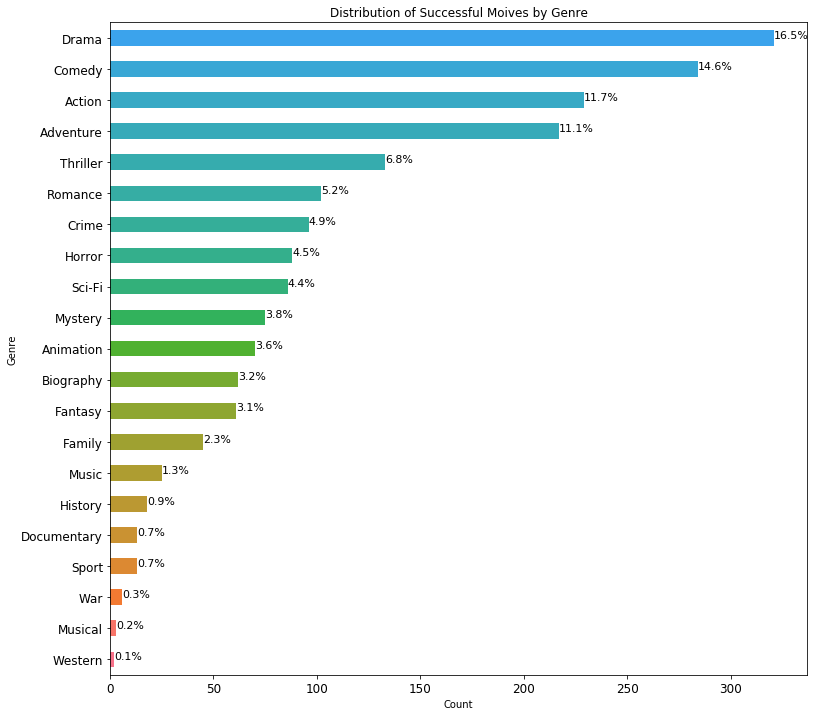

In [55]:
# Plot the unique genre and apprearance
ax = genre_df.groupby(['genres'])['genres'].count().sort_values().plot(kind='barh', figsize=(12.5,12),
                                                                      color=sns.color_palette("husl",30))
plt.xlabel('Count')
plt.xticks(fontsize=12)
plt.ylabel('Genre')
plt.yticks(fontsize=12)
plt.title('Distribution of Successful Moives by Genre')

# Label the percentage of each genres
total = len(genre_df_clean['genres'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total) # find the percentage of each genre
        x = p.get_x() + p.get_width() + 0.02 # x coordinate location
        y = p.get_y() + p.get_height()/2 # y coordinate location
        ax.annotate(percentage, (x, y), size=11) # mark the percentage on each genre
        
plt.savefig("./images/Genre Distribution.png", dpi=300, bbox_inches='tight') # avoid saved image being cutoff
plt.show()

* The above plot shows the percentage of each genre among success movies.
* The top 5 genres in successful movie dataframe are: Drama, Comedy, Action, Adventure, and Thriller.
* Usually a successful movie has more than one genre.
* Selecting top 5 genres could be a good choice.

### Additional Analysis for Q1
* This additional analysis will show the average budget of each genres.

In [56]:
success_df.columns

Index(['tconst', 'movie_title', 'start_year', 'runtime_minutes', 'genres',
       'directors', 'writers', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'year', 'success'],
      dtype='object')

In [57]:
# Create a dateframe has genre and budget
genre_budget_df = success_df[['tconst', 'movie_title', 'genres', 'production_budget']]

In [58]:
# Check
genre_budget_df.head()

,tconst,movie_title,genres,production_budget
0,tt3844362,The Overnight,"Comedy,Mystery",200000.0
1,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",91000000.0
2,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",28000000.0
3,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",215000000.0
4,tt0398286,Tangled,"Adventure,Animation,Comedy",260000000.0


In [59]:
# Drop those genres has NaN values
genre_clean_budget = genre_budget_df.dropna(subset=['genres'], axis=0)

In [60]:
# Split long string
genre_clean_budget['genres'] = genre_clean_budget['genres'].str.split(',')

In [61]:
# Use explode function to transform each element into rows
genre_clean_budget = genre_clean_budget.explode('genres')

In [62]:
# Check
genre_clean_budget.head()

,tconst,movie_title,genres,production_budget
0,tt3844362,The Overnight,Comedy,200000.0
0,tt3844362,The Overnight,Mystery,200000.0
1,tt0359950,The Secret Life of Walter Mitty,Adventure,91000000.0
1,tt0359950,The Secret Life of Walter Mitty,Comedy,91000000.0
1,tt0359950,The Secret Life of Walter Mitty,Drama,91000000.0


In [63]:
# Create a Series with grouped genres with corresponding average production budget
avg_budget = genre_clean_budget.groupby(['genres'])['production_budget'].mean().sort_values()

In [64]:
avg_budget

genres
Documentary    1.679038e+07
Horror         1.941818e+07
Music          2.018800e+07
Romance        2.356250e+07
Mystery        2.454784e+07
Sport          2.624615e+07
Biography      2.854468e+07
Drama          2.880509e+07
History        4.077778e+07
Crime          4.091844e+07
Thriller       4.260066e+07
Comedy         4.847077e+07
War            5.180000e+07
Western        6.750000e+07
Musical        8.410000e+07
Family         8.432222e+07
Action         1.018153e+08
Fantasy        1.020787e+08
Animation      1.106286e+08
Sci-Fi         1.128439e+08
Adventure      1.217843e+08
Name: production_budget, dtype: float64

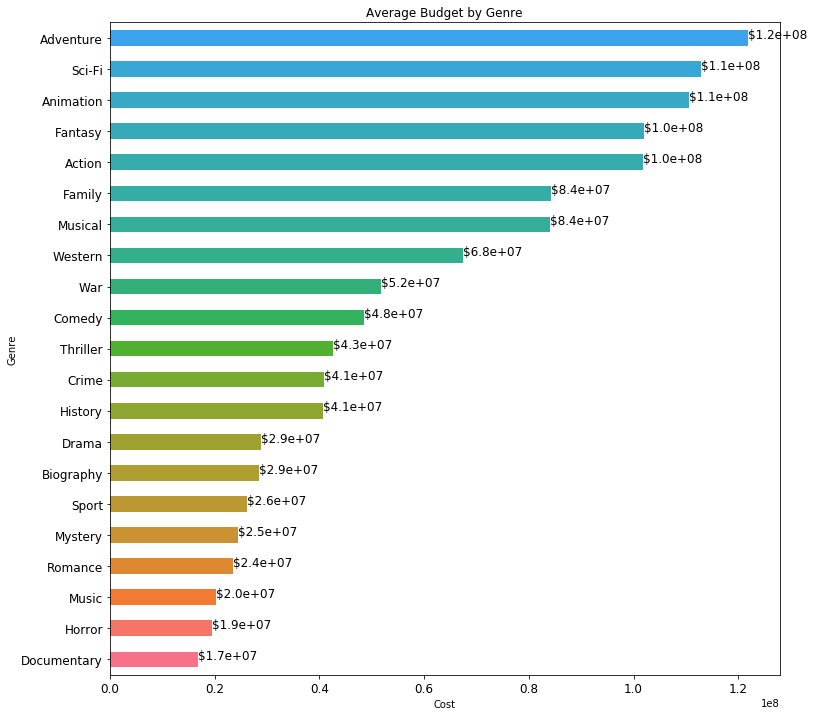

In [65]:
# Plot the genres and show the average budget
ax = avg_budget.plot(kind='barh', figsize=(12,12), color=sns.color_palette("husl",30))

# Display the average budget to corresponding genre
# Use scientific notation
[ax.text(v, i, '${:.1e}'.format(v), size=12) for i, v in enumerate(avg_budget)];
# for spine in plt.gca().spines.values(): # get current axes and label the values
#     spine.set_visible(True)
    
plt.xlabel('Cost')
plt.xticks(fontsize=12)
plt.ylabel('Genre')
plt.yticks(fontsize=12)
plt.title('Average Budget by Genre')

plt.savefig("./images/Average Budget by Genre.png", dpi=300, bbox_inches='tight') # Avoid saved image being cutoff
plt.show()

* The above plot shows the average budget of each genre.
* I would suggest to look at both the distribution of success movie genre and the average budget of each genre. 
* I recommend to select combination of desire genres based on how much budget you have to make successful movies.

###### Hum
* This part was updated (after the project review) to get a better visulization for combination of genres and average budget of each genre.
* Subplots has a better visualization than multiple horizontal barh plots in one figure. If put in one figure, the barhs share the same x-axis. Numbers too large or too small can not show clearly on the figure.

In [66]:
# Want to sort by genre counts
vvv = genre_clean_budget.groupby(['genres'])['production_budget'].agg(['count', 'mean']).sort_values('count')
vvv

,count,mean
genres,,
Western,2,6.750000e+07
Musical,3,8.410000e+07
War,6,5.180000e+07
Sport,13,2.624615e+07
Documentary,13,1.679038e+07
History,18,4.077778e+07
Music,25,2.018800e+07
Family,45,8.432222e+07
Fantasy,61,1.020787e+08


In [67]:
# genre list
gl = vvv.index.tolist()
gl

['Western',
 'Musical',
 'War',
 'Sport',
 'Documentary',
 'History',
 'Music',
 'Family',
 'Fantasy',
 'Biography',
 'Animation',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Crime',
 'Romance',
 'Thriller',
 'Adventure',
 'Action',
 'Comedy',
 'Drama']

In [68]:
# count list
count = vvv['count'].tolist()
count

[2,
 3,
 6,
 13,
 13,
 18,
 25,
 45,
 61,
 62,
 70,
 75,
 86,
 88,
 96,
 102,
 133,
 217,
 229,
 284,
 321]

In [69]:
# budget list
budget = vvv['mean'].tolist()
budget

[67500000.0,
 84100000.0,
 51800000.0,
 26246153.846153848,
 16790384.615384616,
 40777777.777777776,
 20188000.0,
 84322222.22222222,
 102078688.52459016,
 28544677.419354837,
 110628571.42857143,
 24547835.333333332,
 112843895.34883721,
 19418181.818181816,
 40918437.5,
 23562500.0,
 42600659.022556394,
 121784331.79723503,
 101815283.84279476,
 48470774.64788733,
 28805086.13707165]

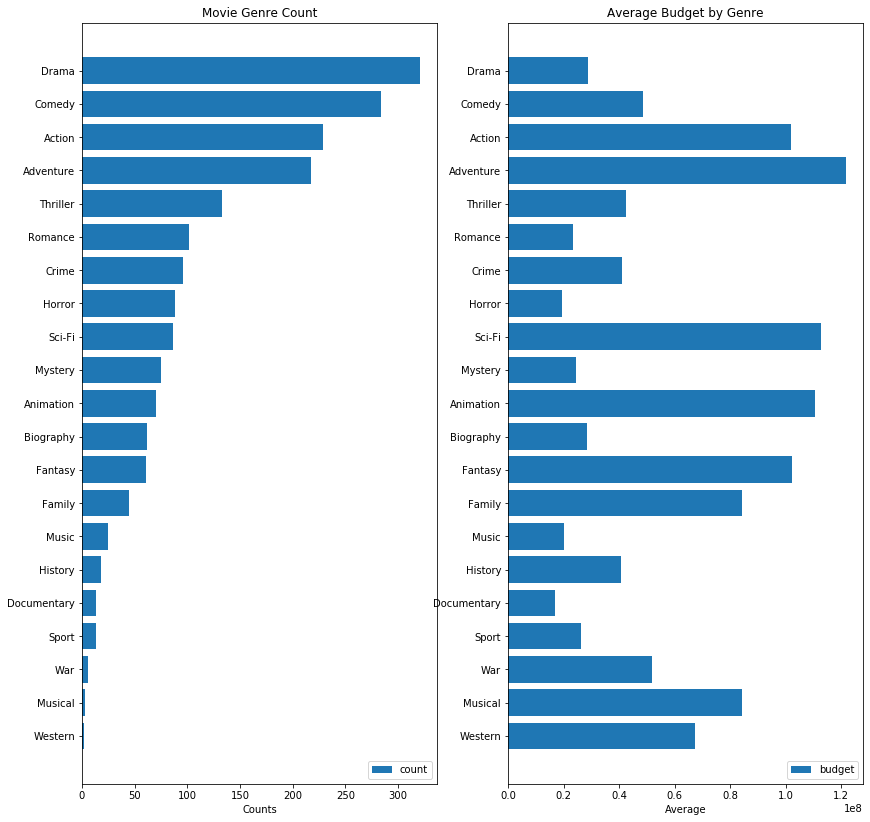

In [70]:
# Use subplot for better visualization
plt.figure(figsize = (14,14))

# Genre distribution by count
ax1 = plt.subplot(121)
ax1.barh(gl, count, label='count')
ax1.set_xlabel('Counts')
ax1.set_title('Movie Genre Count')
ax1.legend(loc=4)

# Average budget of each genre
ax2 = plt.subplot(122)
ax2.barh(gl, budget, label='budget')
ax2.set_xlabel('Average')
ax2.set_title('Average Budget by Genre')
ax2.legend(loc=4)

## Question 2:
* Which directors and writers should be hired among those successful movies?

### Data Name:  imdb.name.basics

In [71]:
df8 = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip')
display(df8.shape)
display(df8.head())
display(df8.info())

(606648, 6)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


None

In [72]:
# Check duplicates
df8['nconst'].duplicated().any()

False

### Data Cleaning

In [73]:
# Drop unnecessary columns
df8.drop(columns=['birth_year', 'death_year', 'primary_profession', 'known_for_titles'], inplace=True)

In [74]:
# Check
df8.columns

Index(['nconst', 'primary_name'], dtype='object')

In [75]:
success_df.columns

Index(['tconst', 'movie_title', 'start_year', 'runtime_minutes', 'genres',
       'directors', 'writers', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'year', 'success'],
      dtype='object')

### Find Top Directors

In [76]:
# Create a director dataframe
director_df = success_df[['tconst', 'movie_title', 'directors']]

In [77]:
director_df.head()

,tconst,movie_title,directors
0,tt3844362,The Overnight,nm2674307
1,tt0359950,The Secret Life of Walter Mitty,nm0001774
2,tt0365907,A Walk Among the Tombstones,nm0291082
3,tt0369610,Jurassic World,nm1119880
4,tt0398286,Tangled,"nm1977355,nm0397174"


#### Note:
* Because the directors are wrote in long strings, we need to separate them for better analysis.

In [78]:
# Split the str in directors column because some movies have more than one director
director_df['directors'] = director_df['directors'].str.split(',')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
# Use explode function to tranform elements into rows
director_df = director_df.explode('directors')

In [80]:
# Check
director_df.head(6)

,tconst,movie_title,directors
0,tt3844362,The Overnight,nm2674307
1,tt0359950,The Secret Life of Walter Mitty,nm0001774
2,tt0365907,A Walk Among the Tombstones,nm0291082
3,tt0369610,Jurassic World,nm1119880
4,tt0398286,Tangled,nm1977355
4,tt0398286,Tangled,nm0397174


### Data Merging

In [81]:
# Merge with df8 to find the corresponding directors' names
director_df = director_df.merge(df8,left_on='directors', right_on='nconst')

In [82]:
# Check
director_df.head()

,tconst,movie_title,directors,nconst,primary_name
0,tt3844362,The Overnight,nm2674307,nm2674307,Patrick Brice
1,tt0359950,The Secret Life of Walter Mitty,nm0001774,nm0001774,Ben Stiller
2,tt0365907,A Walk Among the Tombstones,nm0291082,nm0291082,Scott Frank
3,tt0369610,Jurassic World,nm1119880,nm1119880,Colin Trevorrow
4,tt1862079,Safety Not Guaranteed,nm1119880,nm1119880,Colin Trevorrow


In [83]:
# Change the primary_name column to name column
director_df.rename(columns={'primary_name' : 'name'}, inplace=True)

In [84]:
director_df.columns

Index(['tconst', 'movie_title', 'directors', 'nconst', 'name'], dtype='object')

In [85]:
# Preview the all the directors with descending order
director_df['name'].value_counts()

Tim Story           7
Steven Spielberg    6
Clint Eastwood      5
Jon M. Chu          5
Francis Lawrence    5
                   ..
Ari Aster           1
Tommy Wirkola       1
Gil Kenan           1
Luc Besson          1
Justin Lin          1
Name: name, Length: 570, dtype: int64

In [86]:
# Create a series with director name and number of success movies 
director_name = director_df['name'].value_counts()

In [87]:
# Check the # of directors who have more than 4 successful movies
director_name[director_name>4].count()

6

In [88]:
# Create a series with director name only
director_list = director_df['name']

In [89]:
# Sort value
# Use the tail for better visualization with horizontal bar plot
director_order = director_list.value_counts(ascending=True).tail(6)

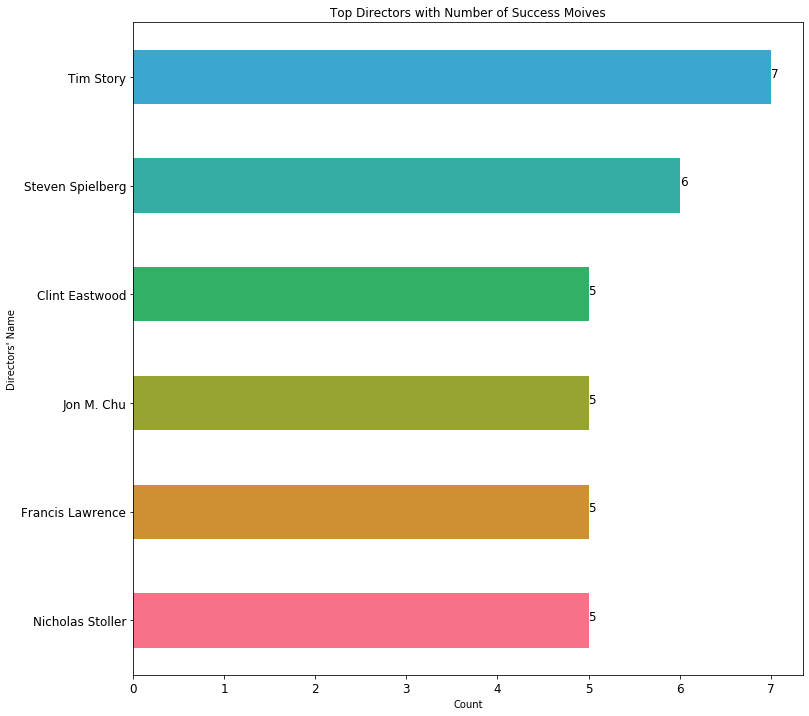

In [90]:
# Plot top directors with number of successful movies
ax = director_order.plot(kind='barh', figsize=(12,12), color=sns.color_palette("husl",8)) 

# Label top directors with corresponding number of successful movies
[ax.text(v, i, '{:}'.format(v), size=12) for i, v in enumerate(director_order)];
# for spine in plt.gca().spines.values():
#     spine.set_visible(True)
    
plt.xlabel('Count')
plt.xticks(fontsize=12)
plt.ylabel("Directors' Name")
plt.yticks(fontsize=12)
plt.title('Top Directors with Number of Success Moives')

plt.savefig("./images/Top Directors.png", dpi = 300, bbox_inches='tight') # Avoid saved image being cutoff
plt.show()

* The above plot shows the top directors who have more than 4 success movies.
* The more successful movies they made, the more experience they have.

### Find Top Writers

In [91]:
# Create a writer dataframe
writer_df = success_df[['tconst', 'movie_title', 'writers']]

In [92]:
writer_df.head()

,tconst,movie_title,writers
0,tt3844362,The Overnight,nm2674307
1,tt0359950,The Secret Life of Walter Mitty,"nm0175726,nm0862122"
2,tt0365907,A Walk Among the Tombstones,"nm0088747,nm0291082"
3,tt0369610,Jurassic World,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341"
4,tt0398286,Tangled,"nm1557594,nm0342278,nm0342303"


#### Note:
* Because the writers are wrote in long strings, we need to separate them for better analysis.

In [93]:
# Split the str in writers column
writer_df['writers'] = writer_df['writers'].str.split(',')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [94]:
# Check
writer_df.head()

,tconst,movie_title,writers
0,tt3844362,The Overnight,[nm2674307]
1,tt0359950,The Secret Life of Walter Mitty,"[nm0175726, nm0862122]"
2,tt0365907,A Walk Among the Tombstones,"[nm0088747, nm0291082]"
3,tt0369610,Jurassic World,"[nm0415425, nm0798646, nm1119880, nm2081046, n..."
4,tt0398286,Tangled,"[nm1557594, nm0342278, nm0342303]"


In [95]:
# Use explode function to transform each element into rows
writer_df = writer_df.explode('writers')

### Data Merging

In [96]:
# Merge with df8 to find the corresponding writers' names
writer_df = writer_df.merge(df8,left_on='writers', right_on='nconst')

In [97]:
# Check
writer_df.head()

,tconst,movie_title,writers,nconst,primary_name
0,tt3844362,The Overnight,nm2674307,nm2674307,Patrick Brice
1,tt0359950,The Secret Life of Walter Mitty,nm0175726,nm0175726,Steve Conrad
2,tt2543472,Wonder,nm0175726,nm0175726,Steve Conrad
3,tt0359950,The Secret Life of Walter Mitty,nm0862122,nm0862122,James Thurber
4,tt0365907,A Walk Among the Tombstones,nm0088747,nm0088747,Lawrence Block


In [98]:
# Change the primary_name column to name column
writer_df.rename(columns={'primary_name' : 'name'}, inplace=True)

In [99]:
# Check
writer_df.columns

Index(['tconst', 'movie_title', 'writers', 'nconst', 'name'], dtype='object')

In [100]:
# Preview the all the writers with descending order
writer_df['name'].value_counts()

Jack Kirby             18
Stan Lee               17
Nicholas Stoller        9
Larry Lieber            8
Christopher Markus      7
                       ..
Todd R. Jones           1
Cameron Crowe           1
Dean Craig              1
Hallie Meyers-Shyer     1
Morten Iversen          1
Name: name, Length: 1424, dtype: int64

In [101]:
# Create a Series with writer name and number of successful movies
writer_name = writer_df['name'].value_counts()

In [102]:
# number of writers who has more than 5 successful movies
writer_name[writer_name>5].count()

8

In [103]:
# Create a series only contains the writer's name
writer_list = writer_df['name']

In [104]:
# Use the tail for better visualization with horizontal bar plot
writer_order = writer_list.value_counts(ascending=True).tail(8)

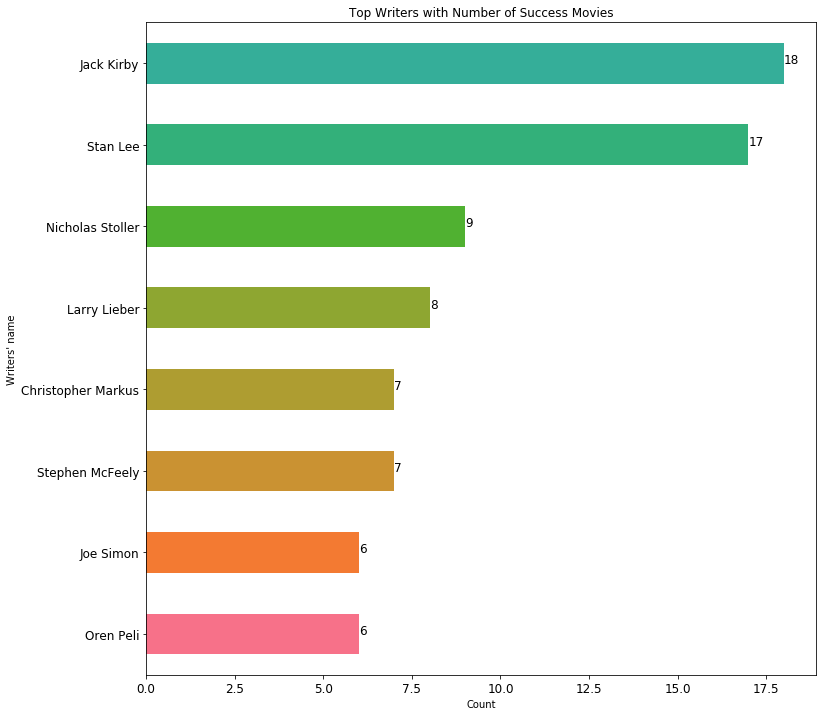

In [105]:
# Plot top writers with number of successful movies
ax = writer_order.plot(kind='barh', figsize=(12,12), color=sns.color_palette("husl",15)) 

# Label top writers with corresponding number of successful movies
[ax.text(v, i, '{:}'.format(v), size=12) for i, v in enumerate(writer_order)];
# for spine in plt.gca().spines.values():
#     spine.set_visible(True)
    
plt.xlabel('Count')
plt.xticks(fontsize=12)
plt.ylabel("Writers' name")
plt.yticks(fontsize=12)
plt.title('Top Writers with Number of Success Movies')

plt.savefig("./images/Top Writers.png", dpi=300, bbox_inches='tight')
plt.show()

* This above plot shows the top writers who have more than 5 success movies.
* The more successful movies they made, the more experience they have.

### Optional Analysis for Q2
* This optional analysis is performed to see if there exist some top directors or top writers among successful movies who may have failures (unsuccessful movies).

In [106]:
# Create a dataframe only contains unsuccessful movies which did not meet the criteria
unsuccessful_df = df7[df7['success'].isna()]

In [107]:
unsuccessful_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 3782
Data columns (total 13 columns):
tconst               691 non-null object
movie_title          691 non-null object
start_year           691 non-null float64
runtime_minutes      677 non-null float64
genres               691 non-null object
directors            691 non-null object
writers              680 non-null object
release_date         691 non-null datetime64[ns]
production_budget    691 non-null float64
domestic_gross       691 non-null float64
worldwide_gross      691 non-null float64
year                 691 non-null int64
success              0 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 75.6+ KB


#### Note
* Use the same analysis method to find those top directors and writers among <b>unsuccessful movies</b>.

### Unsuccessful Directors

In [108]:
unsuccessful_director_df = unsuccessful_df[['tconst', 'movie_title', 'directors']]

In [109]:
unsuccessful_director_df.head()

,tconst,movie_title,directors
0,tt0249516,Foodfight!,nm0440415
6,tt3872966,On the Road,nm4953104
13,tt0376136,The Rum Diary,nm0732430
14,tt0383010,The Three Stooges,"nm0268380,nm0268370"
16,tt0393049,Anderson's Cross,nm1516329


In [110]:
# Split the long string
unsuccessful_director_df['directors'] = unsuccessful_director_df['directors'].str.split(',')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [111]:
# Use explode to transform each element into rows
unsuccessful_director_df = unsuccessful_director_df.explode('directors')

In [112]:
# Merge with df8 to find the corresponding names
unsuccessful_director_df = unsuccessful_director_df.merge(df8,left_on='directors', right_on='nconst')

In [113]:
unsuccessful_director_df.head()

,tconst,movie_title,directors,nconst,primary_name
0,tt0249516,Foodfight!,nm0440415,nm0440415,Lawrence Kasanoff
1,tt3872966,On the Road,nm4953104,nm4953104,Marvin Dau
2,tt0376136,The Rum Diary,nm0732430,nm0732430,Bruce Robinson
3,tt0383010,The Three Stooges,nm0268380,nm0268380,Peter Farrelly
4,tt0480687,Hall Pass,nm0268380,nm0268380,Peter Farrelly


In [114]:
# Change the primary_name to name
unsuccessful_director_df.rename(columns={'primary_name':'name'}, inplace=True)

In [115]:
unsuccessful_director_df.columns

Index(['tconst', 'movie_title', 'directors', 'nconst', 'name'], dtype='object')

In [116]:
director_order

Nicholas Stoller    5
Francis Lawrence    5
Jon M. Chu          5
Clint Eastwood      5
Steven Spielberg    6
Tim Story           7
Name: name, dtype: int64

In [117]:
# Change the Series index to list
dir_name = director_order.index.tolist()
dir_name

['Nicholas Stoller',
 'Francis Lawrence',
 'Jon M. Chu',
 'Clint Eastwood',
 'Steven Spielberg',
 'Tim Story']

In [118]:
# Change the Series values to list
dir_ss = director_order.values.tolist()
dir_ss # top directors' number of successful movies

[5, 5, 5, 5, 6, 7]

In [119]:
# Check if Tim Story appear in unsuccesful movies and number of appearance
print('Tim Story:')
display(unsuccessful_director_df.loc[unsuccessful_director_df['name']=="Tim Story", 'name'].count())

Tim Story:


1

#### Note:
* We have more names to be checked.
* The better way is to define a function and apply the function to a for loop.

In [120]:
# Define a function to find if top directors' names acquire from successful movies dataframe 
# are also in the unsuccessful_director_df
# and count the number of appearance
def director_find_number_of_unsuccessful_movies(name):
    '''
    Check if the names appear in another dataframe
    
    Parameters:
    ----------
    name: str
        top directors' names
    
    Returns:
    -------
    number of name appearance in other dataframe
    
    '''
    return unsuccessful_director_df.loc[unsuccessful_director_df['name'] == name, 'name'].count()

In [121]:
# Create a list for top directors' unsuccessful movie count
dir_us = []
for name in dir_name:
    dir_us.append(director_find_number_of_unsuccessful_movies(name))
print(dir_us)

[0, 0, 1, 2, 1, 1]


### Unsuccessful Writers

In [122]:
unsuccessful_writer_df = unsuccessful_df[['tconst', 'movie_title', 'writers']]

In [123]:
unsuccessful_writer_df.head()

,tconst,movie_title,writers
0,tt0249516,Foodfight!,"nm0440415,nm0923312,nm0295165,nm0841854,nm0220297"
6,tt3872966,On the Road,NaN
13,tt0376136,The Rum Diary,"nm0732430,nm0860219"
14,tt0383010,The Three Stooges,"nm0148808,nm0268370,nm0268380"
16,tt0393049,Anderson's Cross,nm1516329


In [124]:
# Split the long string
unsuccessful_writer_df['writers'] = unsuccessful_writer_df['writers'].str.split(',')

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
# Use explode to transform each element into rows
unsuccessful_writer_df = unsuccessful_writer_df.explode('writers')

In [126]:
# Merge with df8 to find the corresponding names
unsuccessful_writer_df = unsuccessful_writer_df.merge(df8,left_on='writers', right_on='nconst')

In [127]:
unsuccessful_writer_df.head()

,tconst,movie_title,writers,nconst,primary_name
0,tt0249516,Foodfight!,nm0440415,nm0440415,Lawrence Kasanoff
1,tt0249516,Foodfight!,nm0923312,nm0923312,Joshua Wexler
2,tt0249516,Foodfight!,nm0295165,nm0295165,Brent V. Friedman
3,tt0249516,Foodfight!,nm0841854,nm0841854,Rebecca Swanson
4,tt0249516,Foodfight!,nm0220297,nm0220297,Sean Catherine Derek


In [128]:
# Change primary_name to name
unsuccessful_writer_df.rename(columns={'primary_name':'name'}, inplace=True)

In [129]:
unsuccessful_writer_df.columns

Index(['tconst', 'movie_title', 'writers', 'nconst', 'name'], dtype='object')

In [130]:
# Change the Series index to list
wri_name = writer_order.index.tolist()
wri_name 

['Oren Peli',
 'Joe Simon',
 'Stephen McFeely',
 'Christopher Markus',
 'Larry Lieber',
 'Nicholas Stoller',
 'Stan Lee',
 'Jack Kirby']

In [131]:
# Change the Series values to list
wri_ss = writer_order.values.tolist()
wri_ss # top writers' number of successful movies

[6, 6, 7, 7, 8, 9, 17, 18]

In [132]:
# Define a function to find if top writers' names acquire from successful movies dataframe 
# are also in the unsuccessful_writer_df
# and count the number of appearance
def writer_find_number_of_unsuccessful_movies(name):
    '''
    Check if the names appear in another dataframe
    
    Parameters:
    ----------
    name: str
        top writers' names
    
    Returns:
    -------
    number of name appearance in other dataframe
    
    '''
    return unsuccessful_writer_df.loc[unsuccessful_writer_df['name'] == name, 'name'].count()

In [133]:
# Create a list for top writers' unsuccessful movie count
wri_us = []
for n in wri_name:
    wri_us.append(writer_find_number_of_unsuccessful_movies(n))
print(wri_us)

[1, 0, 0, 0, 0, 2, 2, 2]


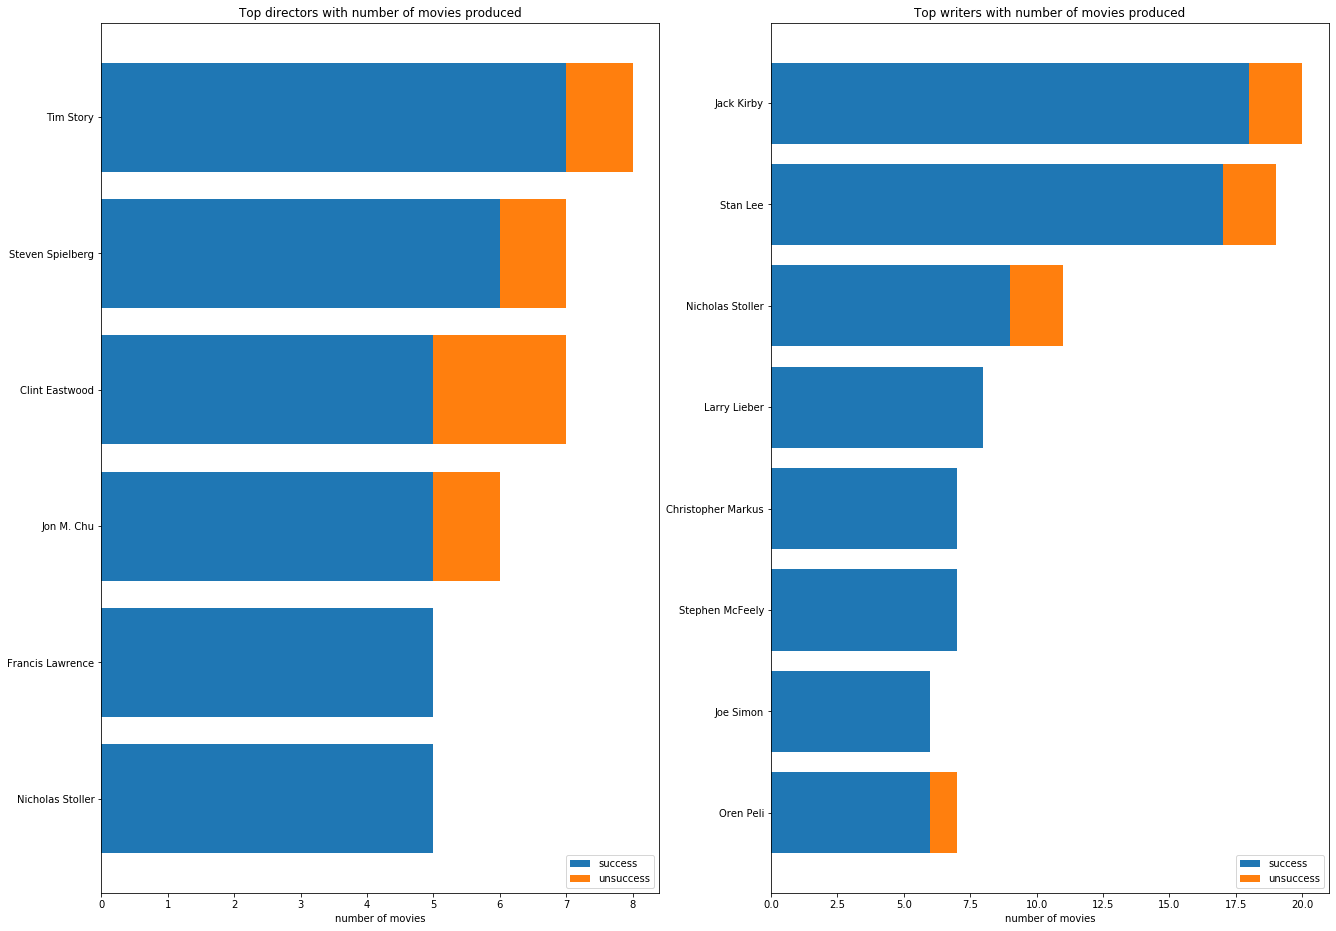

In [134]:
# Want to put those two figure together

plt.figure(figsize=(22, 16))

# Top directors
ax1 = plt.subplot(121)
ax1.barh(dir_name, dir_ss, label='success')
ax1.barh(dir_name, dir_us, left=dir_ss, label='unsuccess')
ax1.set_xlabel('number of movies')
ax1.set_title('Top directors with number of movies produced')
ax1.legend(loc=4)

# Top writers
ax2 = plt.subplot(122)
ax2.barh(wri_name, wri_ss, label='success')
ax2.barh(wri_name, wri_us, left=wri_ss, label='unsuccess')
ax2.set_xlabel('number of movies')
ax2.set_title('Top writers with number of movies produced')
ax2.legend(loc=4)

plt.savefig("./images/Top Directors and Top Writers.png", dpi=300, bbox_inches='tight')
plt.show()

* The above plot shows that some top directors/top writers have 100% successful rate while some of them have several unsuccessful movies
* Successful experience is necessary.
* Unsuccessful experience is also important.
* It would depend on stakeholders who prefer more on succesful rate or number of experience.

## Question 3:
* Which month has the highest release of successful movies?

In [135]:
success_df.columns

Index(['tconst', 'movie_title', 'start_year', 'runtime_minutes', 'genres',
       'directors', 'writers', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'year', 'success'],
      dtype='object')

In [136]:
# Create a release date dataframe
release_df = success_df[['tconst', 'movie_title', 'release_date']]

In [137]:
release_df.head()

,tconst,movie_title,release_date
0,tt3844362,The Overnight,2015-06-19
1,tt0359950,The Secret Life of Walter Mitty,2013-12-25
2,tt0365907,A Walk Among the Tombstones,2014-09-19
3,tt0369610,Jurassic World,2015-06-12
4,tt0398286,Tangled,2010-11-24


In [138]:
# Extract month out
release_df['month_in_num'] = release_df['release_date'].dt.month

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [139]:
# Check
release_df.head()

,tconst,movie_title,release_date,month_in_num
0,tt3844362,The Overnight,2015-06-19,6
1,tt0359950,The Secret Life of Walter Mitty,2013-12-25,12
2,tt0365907,A Walk Among the Tombstones,2014-09-19,9
3,tt0369610,Jurassic World,2015-06-12,6
4,tt0398286,Tangled,2010-11-24,11


In [140]:
# Define a function to tranlate month in num to words
def month_in_word(num):
    '''
    Change the month from numbers to words.
    ex. 1 => January
    
    Parameters:
    ----------
    Pandas DataFrame with column type: int
    
    Returns:
    --------
    Pandas DataFrame with column type: str
    '''
    if num == 1:
        return "January"
    elif num == 2:
        return "February"
    elif num == 3:
        return "March"
    elif num == 4:
        return "April"
    elif num == 5:
        return "May"
    elif num == 6:
        return "June"
    elif num == 7:
        return "July"
    elif num == 8:
        return "August"
    elif num == 9:
        return "September"
    elif num == 10:
        return "October"
    elif num == 11:
        return "November"
    else:
        return "December"

In [141]:
# Apply the function
release_df['month'] = release_df['month_in_num'].apply(month_in_word)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
# Check
release_df.head()

,tconst,movie_title,release_date,month_in_num,month
0,tt3844362,The Overnight,2015-06-19,6,June
1,tt0359950,The Secret Life of Walter Mitty,2013-12-25,12,December
2,tt0365907,A Walk Among the Tombstones,2014-09-19,9,September
3,tt0369610,Jurassic World,2015-06-12,6,June
4,tt0398286,Tangled,2010-11-24,11,November


In [143]:
# Check for NaN value
release_df['release_date'].isna().any()

False

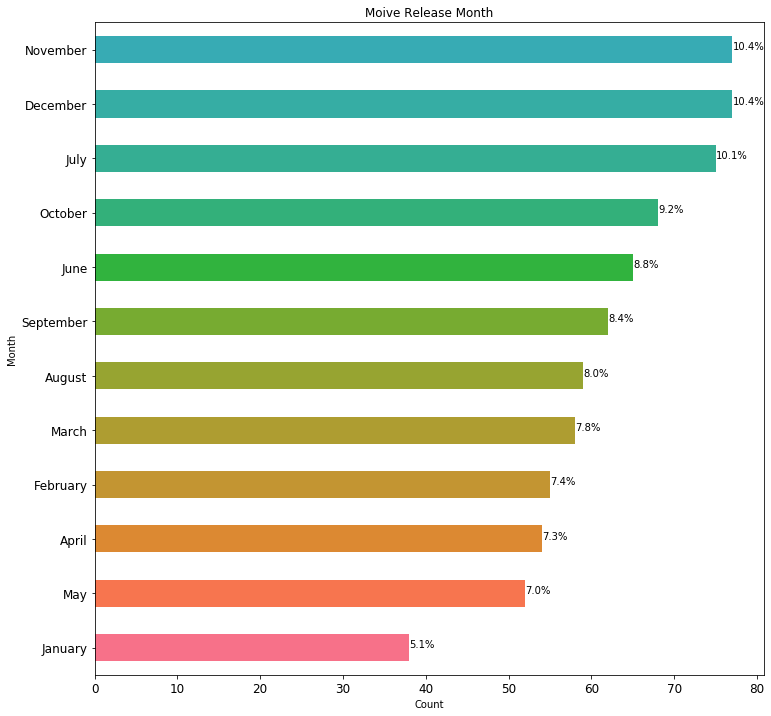

In [144]:
# Plot each month with percentages of successful movie release
ax = release_df.groupby(['month'])['month'].count().sort_values().plot(kind='barh', figsize=(12,12), color=sns.color_palette("husl",20))
plt.xlabel('Count')
plt.xticks(fontsize=12)
plt.ylabel('Month')
plt.yticks(fontsize=12)
plt.title('Moive Release Month')

total = len(release_df['month'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total) # calculate the percentage of each month release rate over total
        x = p.get_x() + p.get_width() + 0.02 # x coordinate location
        y = p.get_y() + p.get_height()/2 # y coordiante location
        ax.annotate(percentage, (x, y))

plt.savefig("./images/Release Month.png", dpi=300, bbox_inches='tight') # avoid saved images being cutoff
plt.show()

* The above plot shows that November and December both have the highest release number of successful movies. This could be November and December both have big holidays.
* I recommend to release movies in November and December, and avoid January.

### If prefer to view the month in order...

In [145]:
# group the month and count the number of each month appears
r = release_df.groupby(['month'])['month'].agg(['count']).reset_index()

In [146]:
# Check
r

,month,count
0,April,54
1,August,59
2,December,77
3,February,55
4,January,38
5,July,75
6,June,65
7,March,58
8,May,52
9,November,77


In [147]:
# Define an order
cats=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [148]:
# Apply the order
r['month'] = pd.Categorical(r['month'],categories=cats, ordered=True)

In [149]:
# Sort by defined order
re = r.sort_values(by='month', ascending=False).set_index('month')

In [150]:
re

,count
month,
December,77
November,77
October,68
September,62
August,59
July,75
June,65
May,52
April,54


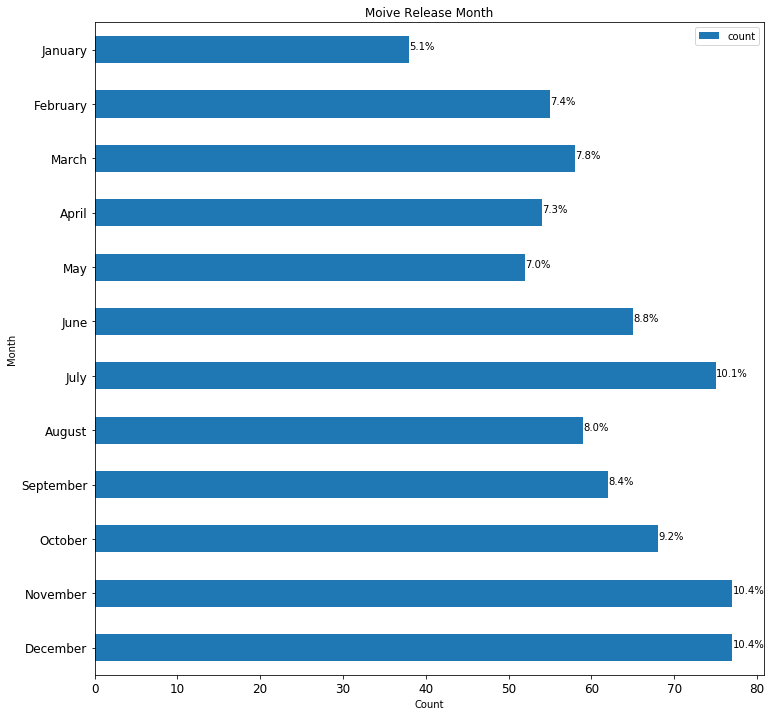

In [151]:
# Plot: order by month
ax = re.plot(kind='barh', figsize=(12,12))
plt.xlabel('Count')
plt.xticks(fontsize=12)
plt.ylabel('Month')
plt.yticks(fontsize=12)
plt.title('Moive Release Month')

# Label the percentage
total = len(release_df['month'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

plt.legend(loc=1) # top right position

plt.savefig("./images/Release Month Order", bbox_inches='tight') # avoid saved images being cutoff
plt.show()

* Both November and December have the highest release of successful movies.
* January has the lowest release of successful movies.

## Question 4:
* What is the optimal length for a successful movie?

In [152]:
success_df.columns

Index(['tconst', 'movie_title', 'start_year', 'runtime_minutes', 'genres',
       'directors', 'writers', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'year', 'success'],
      dtype='object')

In [153]:
# Create a dataframe with movie length
movie_length_df = success_df[['tconst', 'movie_title', 'runtime_minutes']]

In [154]:
movie_length_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 3 columns):
tconst             740 non-null object
movie_title        740 non-null object
runtime_minutes    740 non-null float64
dtypes: float64(1), object(2)
memory usage: 17.5+ KB


In [155]:
# Find the minimum and maximum movie length
display(movie_length_df['runtime_minutes'].min())
display(movie_length_df['runtime_minutes'].max())

41.0

180.0

In [156]:
# Find the average movie length
movie_length_df['runtime_minutes'].mean()

110.41081081081082

In [157]:
# Find the median movie length
movie_length_df['runtime_minutes'].median()

107.0

In [158]:
# Find the 25% and 75% quantile values
display(movie_length_df['runtime_minutes'].quantile(0.25))
display(movie_length_df['runtime_minutes'].quantile(0.75))

97.0

121.0

In [159]:
# Create an array for the movie runtime
length_arr = np.array(movie_length_df['runtime_minutes'])

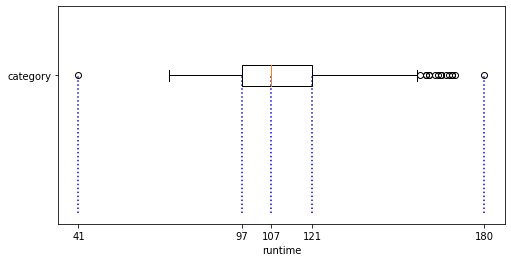

In [160]:
# Plot in boxplot and  label the min, 25% quantile, median, 75% quantile, and maximum, include outliers
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.boxplot(length_arr, vert=False, manage_ticks=True) # want horizontal
ax.set_xlabel('runtime')
ax.set_yticklabels(['category'])

quantiles = np.quantile(length_arr, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
#         x position           y min                 y max
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size, color='blue', ls=':', lw=1.5)
ax.set_xticks(quantiles)

plt.savefig("./images/Movie Length.png", dpi=300, bbox_inches='tight')
plt.show()

* The average movie length among successful movies is 110 minutes. But when I plot the movie length in boxplot, there exits some outliers which means there are some movies are have extremely shorter or longer running time. 
* Those outliers can skew the averages.
* The median movie length is 107 minutes.
* I would suggest to set the optimal movie length between the 25% and 75% quantile values, which is between 97 and 121 minutes.

## Conclusion
Among filtrated 1431 movies between 2010 and 2020, there are 740 movies considered as successful movies from perspective of returns. These successful movies analysis leads to 4 recommendations. 
* <b>Movie Genre</b> - The top 5 genres are Drama, Comedy, Action, Adventure, and Thriller. Additional analysis was provided to find the average budget for each of the genre. Usually, a succesful movie has more than one genre. Stakeholders can choose their desired combination genres based on the budget.
* <b>Directors and Writers</b> - There are 6 top directors who have more than 4 successful movies and 8 top writers who have more than 5 successful movies. Some top directors/top writers have 100% successful rate while some of them have several unsuccessful movies. Both successful and unsuccessful experience are important. It would depend on stakeholders who prefer more on succesful rate or number of experience.
* <b>Release Month</b> - November and December are the best months for releasing successful movies. 
* <b>Movie Length</b> - The optimal movie length for a succeesful movie is between 97 and 121 minutes.

### Next Steps:
Because there is a limit amount of time and this is phase 1 project, I think further analysis can yield additional insight:
* <b> Prediction Analysis</b> - Prediction on how much gross can be earned based on different budget.
* <b> Datasets with Age groups </b> - The provided datasets did not cover age range. With the age provided, further descriptive analysis can be made on movie popularity for targeting towards specific age groups.
* <b> Movie Trailer</b> - A better movie trailers can attract more customers earlier. Select length and determine releasing date of movie trailers are also important factors of successful movies.